In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("weights_acc_assess.csv", header=None)

In [73]:
df

,0,1,2,3,4
0,weight,avg_error,avg_perror,pm_3_years,pm_8_years
1,1,9.458,0.2883231587128861,0.269,0.522
2,2,9.104,0.27534193590932365,0.287,0.548
3,3,9.455,0.29321458303903425,0.274,0.527
4,4,9.289,0.28940178608898476,0.281,0.547
...,...,...,...,...,...
96,96,6.674,0.20990627341207246,0.367,0.703
97,97,6.837,0.21723727847750965,0.355,0.693
98,98,6.732,0.21401323747486262,0.364,0.698
99,99,6.817,0.21617416702701087,0.366,0.688


In [74]:
df.columns = ["weight", "avg_error", "avg_perror", "pm_3_years", "pm_8_years"]

In [75]:
df = df.drop(index=0)

In [76]:
df = df.astype(float)

In [77]:
selected = ["pm_3_years", "pm_8_years"]
df_years = df[selected]
df_years

,pm_3_years,pm_8_years
1,0.269,0.522
2,0.287,0.548
3,0.274,0.527
4,0.281,0.547
5,0.297,0.521
...,...,...
96,0.367,0.703
97,0.355,0.693
98,0.364,0.698
99,0.366,0.688


In [182]:
def plot_line(df, xlabel, ylabel, title, ticks=5) -> None:
    return df.plot(
        kind="line",
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        grid=True,
        xticks=range(0, len(df_years.index)+1, ticks),
    )

<AxesSubplot: title={'center': 'Accuracy for age range'}, xlabel='Epoch', ylabel='Accuracy'>

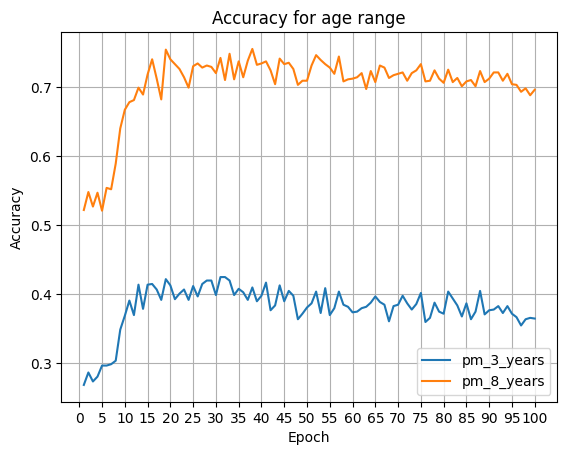

In [255]:
plot_line(df_years, "Epoch", "Accuracy", "Accuracy for age range", )

In [246]:
def plot_trend(xy:list, title, label, start:int, end:int, ticks:int=2) -> None:
    x = df[xy[0]].iloc[start:end]
    y = df[xy[1]].iloc[start:end]
    
    # Plot the data points as a line
    plt.plot(x, y, label=label)
    plt.xticks(range(start, end+1, ticks))
    plt.grid(True)

    # Find the coefficients of the line of best fit
    fit = np.polyfit(x, y, 1)
    slope = fit[0]
    intercept = fit[1]

    # Plot the line of best fit on top of the data points
    plt.plot(x, slope*x + intercept, label='Trend Line')

    # Add a legend and labels for the axes
    plt.legend()
    plt.xlabel("Weight")
    plt.ylabel(label)
    plt.title(f"{title}, Epochs {start}-{end}")
    
    # Show the plot
    plt.show()

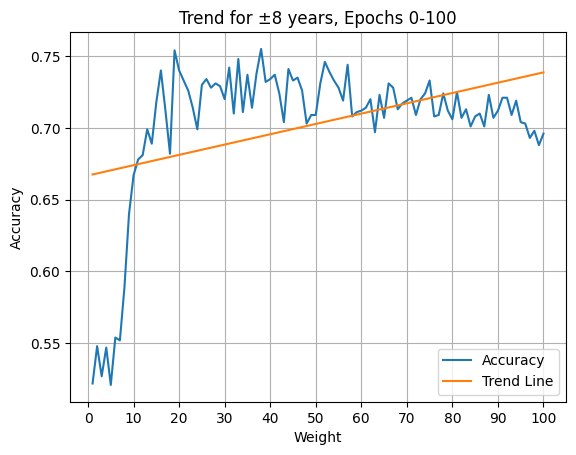

In [247]:
plot_trend(['weight', 'pm_8_years'], f"Trend for ±8 years", "Accuracy", 0, 100, ticks=10)

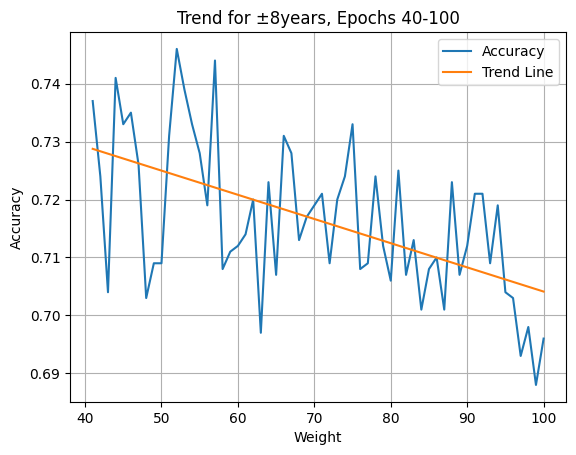

In [260]:
plot_trend(['weight', 'pm_8_years'], "Trend for ±8years", "Accuracy", 40, 100, ticks=10)

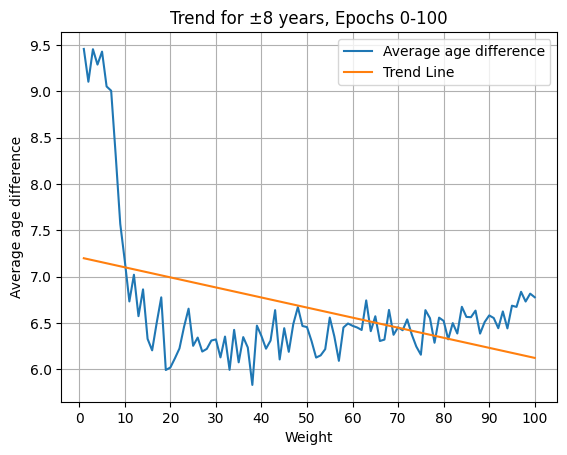

In [249]:
plot_trend(['weight', 'avg_error'], "Trend for ±8 years", "Average age difference", 0, 100, ticks=10)

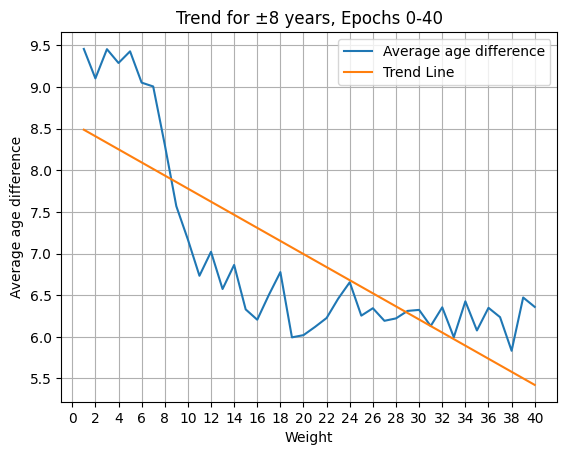

In [250]:
plot_trend(['weight', 'avg_error'], "Trend for ±8 years", "Average age difference", 0, 40, ticks=2)

In [258]:
best = df.loc[38]
print(f"Our final results")
print(f"Average age difference (±8 years): ±{best['avg_error']}, predicted 24-36 for actual age 30")
print(f"Avg. percentage error: ±{best['avg_perror']*100:.2f}%")
print(f"±3 years accuracy: {best['pm_3_years']*100:.2f}%")
print(f"±8 years accuracy: {best['pm_8_years']*100:.2f}%")

Our final results
Average age difference (±8 years): ±5.832, predicted 24-36 for actual age 30
Avg. percentage error: ±18.57%
±3 years accuracy: 41.00%
±8 years accuracy: 75.50%


In [254]:
print("In other words, it means that if somebody's actual age is 30, our model is 41% sure that his age is 27-33 and 75% sure that the age lies 24-36. Our model is already better than 3/4 of humans as average human error is around ±8 years.")

In other words, it means that if somebody's actual age is 30, our model is 41% sure that his age is 27-33 and 75% sure that the age lies 24-36. Our model is already better than 3/4 of humans as average human error is around ±8 years.
